# Full Gait

----

Kevin J. Walchko, created 12 Nov 2016

This notebook calls the actual robot code and plots both the x,y,z positions and the 3 servo angles of a leg during a gait. The command can be modified below to determine the movement.

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../..')
from math import pi
from Quadruped import Quadruped
from Gait import DiscreteRippleGait, ContinousRippleGait

## Setup

Create a quadrupted `robot` with correct leg segment lengths.

In [11]:
data = {
#     'serialPort': '/dev/tty.usbserial-A5004Flb',
    'legLengths': {
        'coxaLength': 45,
        'femurLength': 55,
        'tibiaLength': 104
    },
    'legAngleLimits': [[-90, 90], [-90, 90], [-180, 0]],
    'legOffset': [150, 150, 150+90]
}
robot = Quadruped(data)
leg = robot.legs[0].foot0

Now create a gait and a command to execute for one complete duty cycle. This will produce both the foot positions (x,y,z) and the servo angles ($\theta_1$,$\theta_2$,$\theta_3$) for each step sequence. 

In [5]:
# Edit this command for linear [mm] or angular [rads] movements.
cmd = {'linear': [0,0], 'angle': pi/4}
# cmd = {'linear': [50,0], 'angle': 0}
height = 25  # height the foot is lifted during movement in mm

# gait = ContinousRippleGait(height, leg)
gait = DiscreteRippleGait(height, leg)
alpha = 1.0
pos = []
for i in range(0,12):
    p = gait.eachLeg(i,cmd)
    pos.append(p)
    print('pos: {:.2f} {:.2f} {:.2f}'.format(*p))

pos: 77.51 32.10 -52.61
pos: 83.17 10.95 -40.11
pos: 83.17 -10.95 -40.11
pos: 77.51 -32.10 -52.61
pos: 80.01 -25.23 -65.11
pos: 81.90 -18.16 -65.11
pos: 83.17 -10.95 -65.11
pos: 83.81 -3.66 -65.11
pos: 83.81 3.66 -65.11
pos: 83.17 10.95 -65.11
pos: 81.90 18.16 -65.11
pos: 80.01 25.23 -65.11


In [6]:
angle = []
for p in pos:
#     print('pos: {:.2f} {:.2f} {:.2f}'.format(*p))
    a = robot.legs[0].move(*p)
    print('angle: {:.2f} {:.2f} {:.2f}'.format(*a))
    if a:
        angle.append(a)

angle: 22.50 65.67 -146.69
angle: 7.50 93.57 -159.56
angle: -7.50 93.57 -159.56
angle: -22.50 65.67 -146.69
angle: -17.50 45.00 -135.00
angle: -12.50 45.00 -135.00
angle: -7.50 45.00 -135.00
angle: -2.50 45.00 -135.00
angle: 2.50 45.00 -135.00
angle: 7.50 45.00 -135.00
angle: 12.50 45.00 -135.00
angle: 17.50 45.00 -135.00


## Plotting the Results

We will now plot the x, y, z, and x-y plane (ground plane) plots for the foot's position. Also the each of the leg's servo angles will be plotted.  

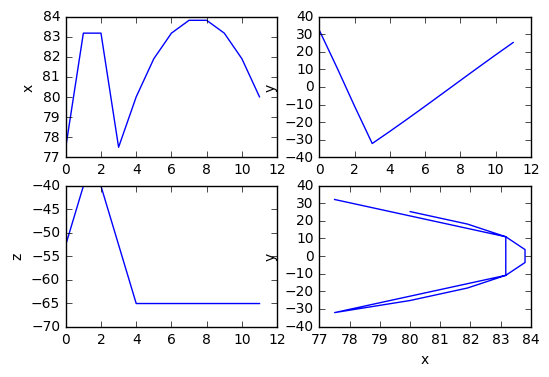

In [7]:
px = []
py = []
pz = []
for p in pos:
    px.append(p[0])
    py.append(p[1])
    pz.append(p[2])

plt.subplot(2,2,1);
plt.plot(px);
plt.ylabel('x');

plt.subplot(2,2,2);
plt.plot(py);
plt.ylabel('y');

plt.subplot(2,2,3);
plt.plot(pz);
plt.ylabel('z');

plt.subplot(2,2,4);
plt.plot(px,py);
plt.ylabel('y');
plt.xlabel('x');

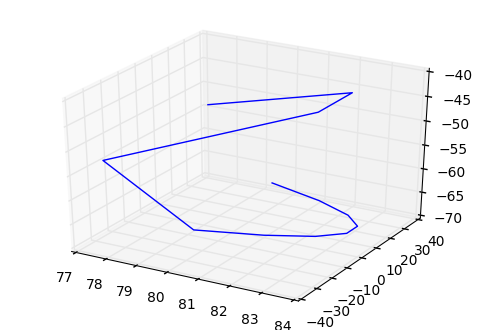

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(px, py, pz);

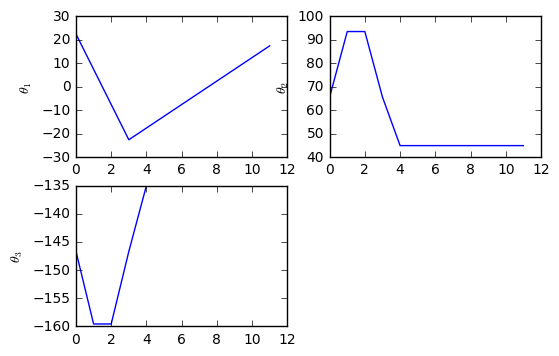

In [9]:
t1 = []
t2 = []
t3 = []
for a in angle:
    t1.append(a[0])
    t2.append(a[1])
    t3.append(a[2])

plt.subplot(2,2,1);
plt.plot(t1)
plt.ylabel('$\\theta_1$')

plt.subplot(2,2,2)
plt.plot(t2)
plt.ylabel('$\\theta_2$')

plt.subplot(2,2,3);
plt.plot(t3)
plt.ylabel('$\\theta_3$');

# plt.subplot(2,2,4);
# plt.plot(px,py)
# plt.ylabel('y')
# plt.xlabel('x')

In [10]:
print('Number of points: {}'.format(len(angle)))
print('-----------------------')
for a in angle:
    print('{:.2f} {:.2f} {:.2f}'.format(*a))

Number of points: 12
-----------------------
22.50 65.67 -146.69
7.50 93.57 -159.56
-7.50 93.57 -159.56
-22.50 65.67 -146.69
-17.50 45.00 -135.00
-12.50 45.00 -135.00
-7.50 45.00 -135.00
-2.50 45.00 -135.00
2.50 45.00 -135.00
7.50 45.00 -135.00
12.50 45.00 -135.00
17.50 45.00 -135.00



-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.